# **Kaggle Competition-Titanic Machine Learning From Disaster**

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Kaggle_Datasets/Kaggle_Titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Kaggle_Datasets/Kaggle_Titanic/test.csv')
df_test.head()
df_test_passID=df_test.copy()['PassengerId']

In [ ]:
df_sub=pd.read_csv('/content/drive/MyDrive/Kaggle_Datasets/Kaggle_Titanic/gender_submission.csv')
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
print(df_train.dtypes)
print(df_train.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)


In [ ]:
df=df_train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
feature_names=df.columns.to_numpy()
print(feature_names)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# **Graphs**

In [ ]:
def count_plots(df,column_names=df.columns.to_numpy()):
    num_features = len(column_names)
    feature_names=column_names
    num_rows = (num_features + 1) // 2  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

    for i in range(num_rows):
        for j in range(2):
            index = i * 2 + j
            if index < num_features:
                feature_column = feature_names[index]
                sns.countplot(x=feature_column, data=df, ax=axes[i, j])
                axes[i, j].set_title(f'{feature_column} vs Count')
            else:
                # If there are unused subplots, remove them
                fig.delaxes(axes[i, j])

    plt.tight_layout()
    plt.show()

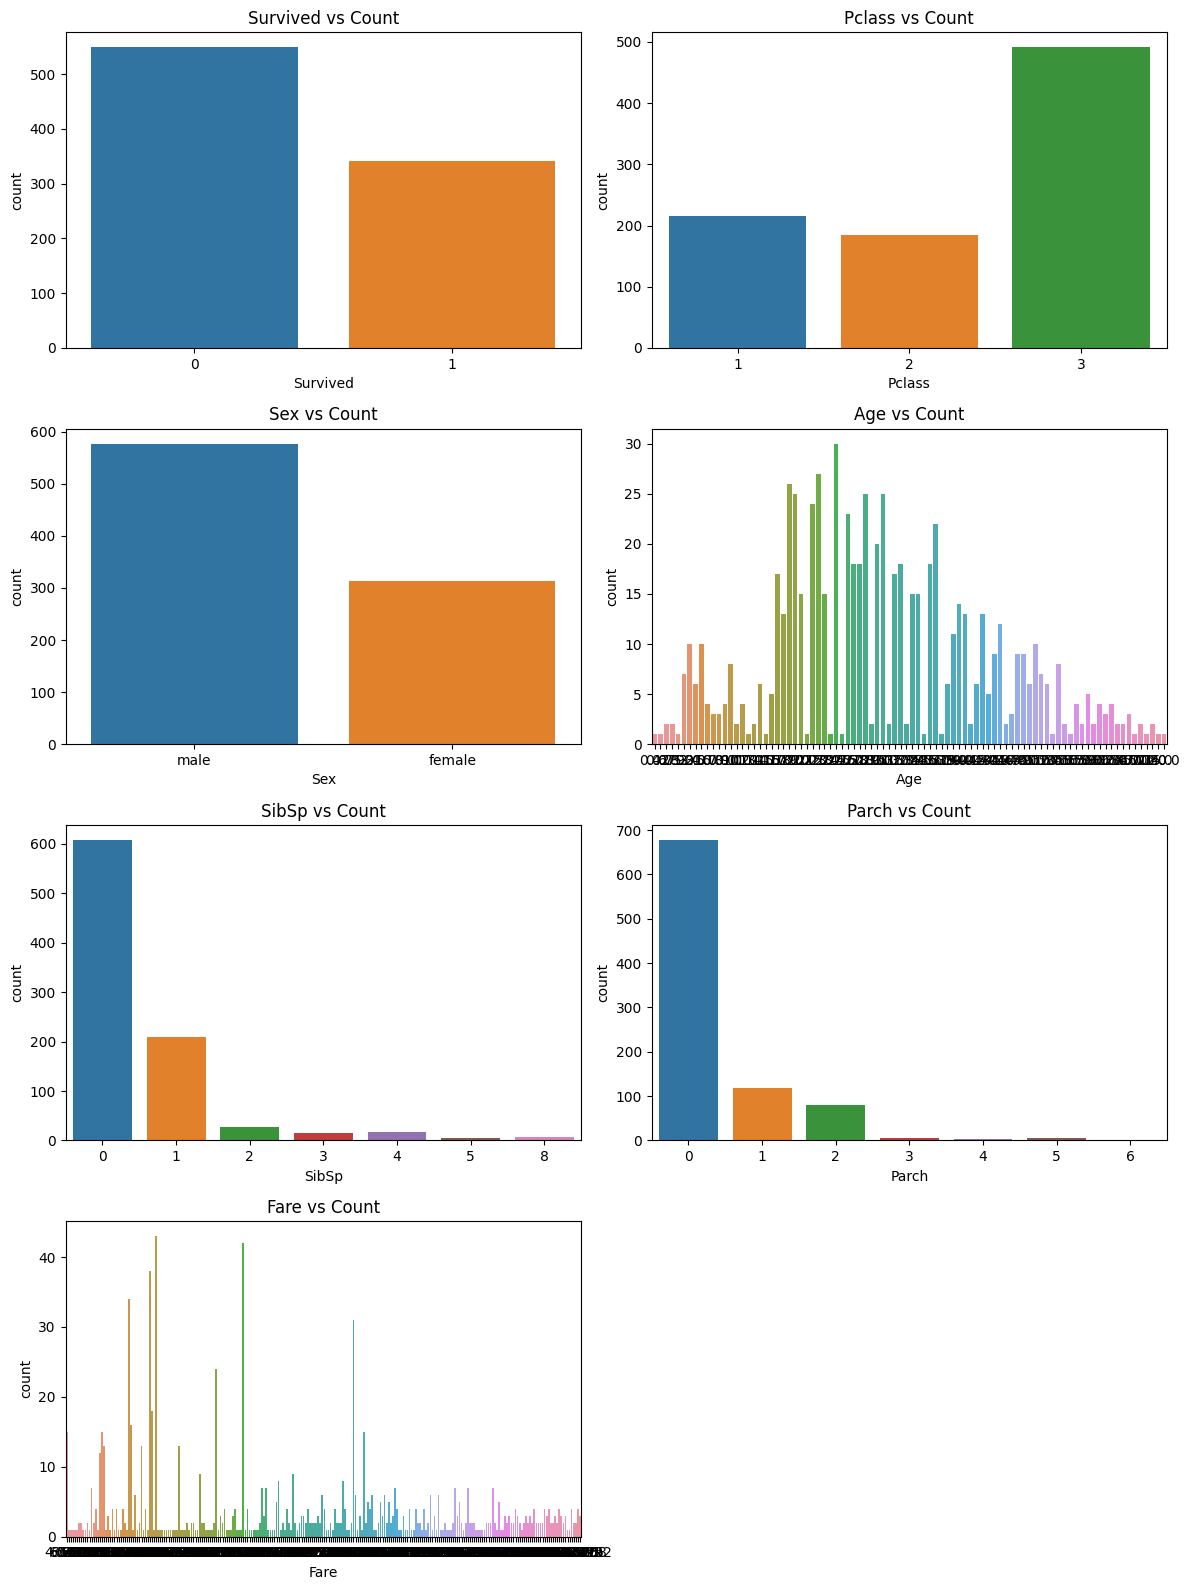

In [ ]:
count_plots(df,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'])

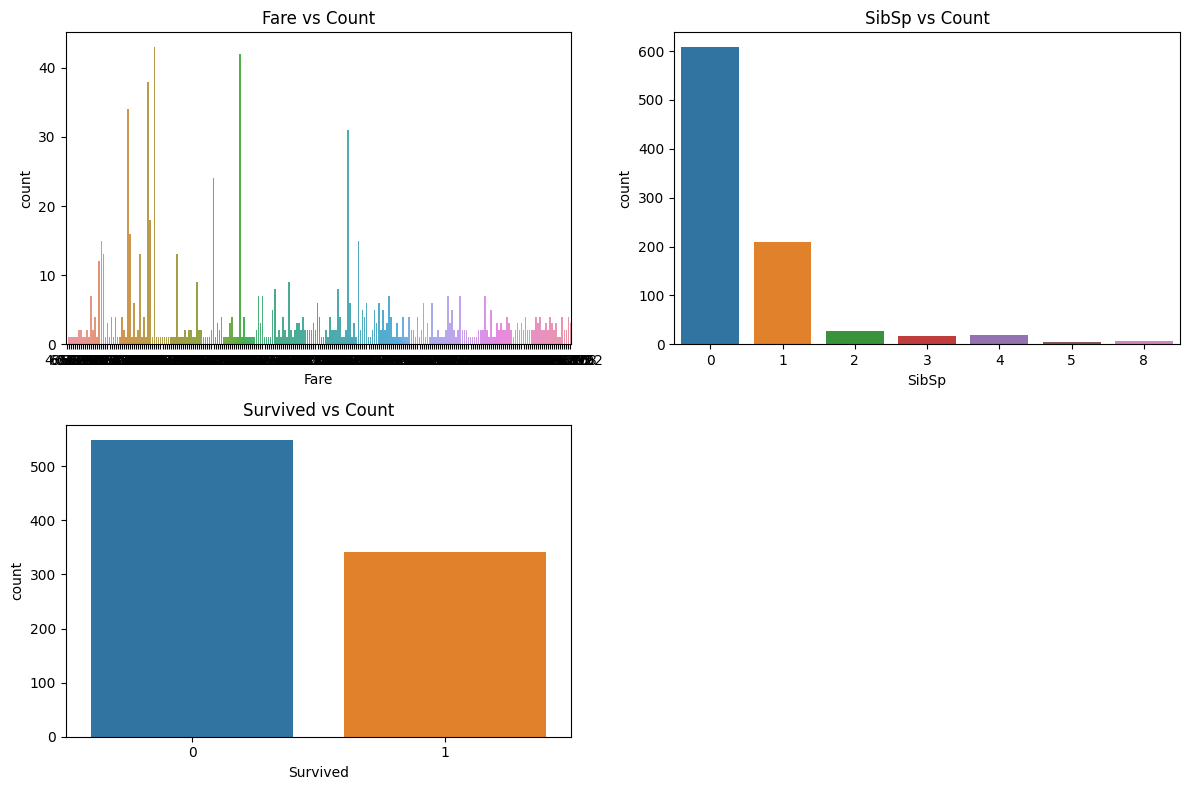

In [ ]:
count_plots(df,['Fare','SibSp','Survived'])

Text(0.5, 1.0, 'Scatter Plot of Age Passanger Class (Size based on SibSp, Color based on Pclass)')

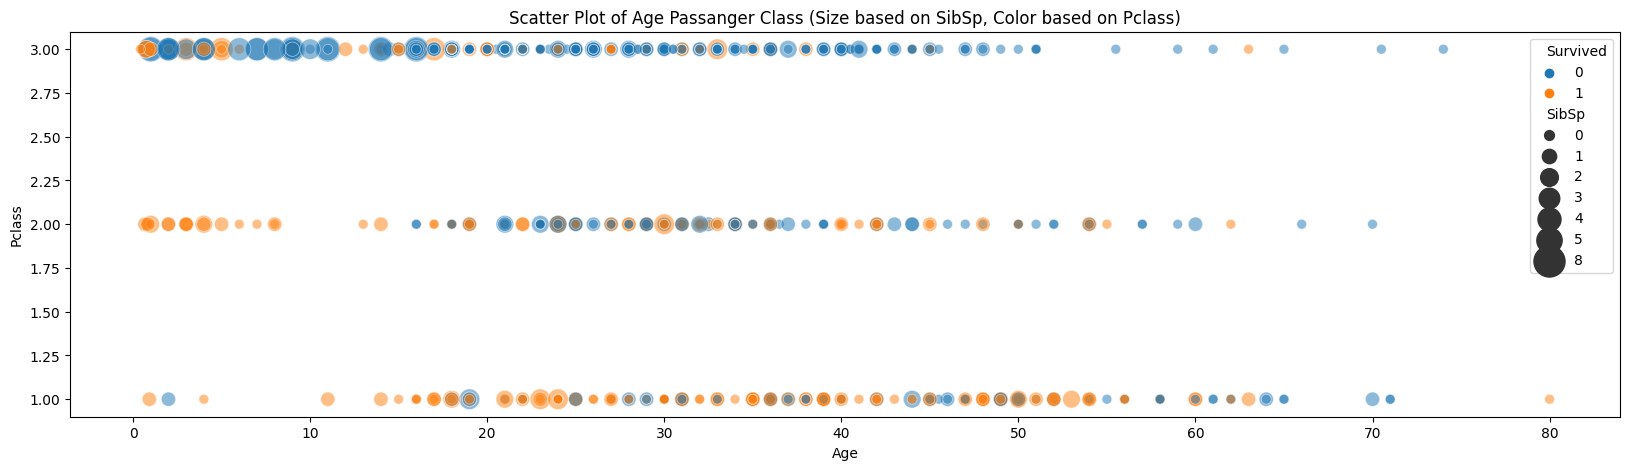

In [ ]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Age', y='Pclass', size='SibSp', sizes=(50, 500), hue='Survived', alpha=0.5,data=df, legend='full')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.title('Scatter Plot of Age Passanger Class (Size based on SibSp, Color based on Pclass)')


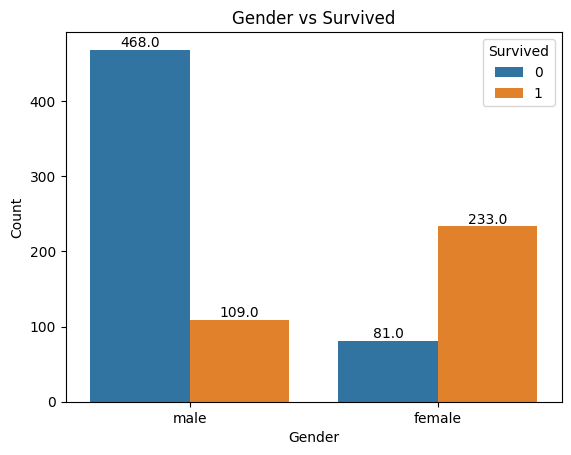

In [ ]:
ax=sns.countplot(x="Sex", data=df, hue="Survived")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Survived')
plt.show()

# **Filling The Cabin Column**

<Axes: >

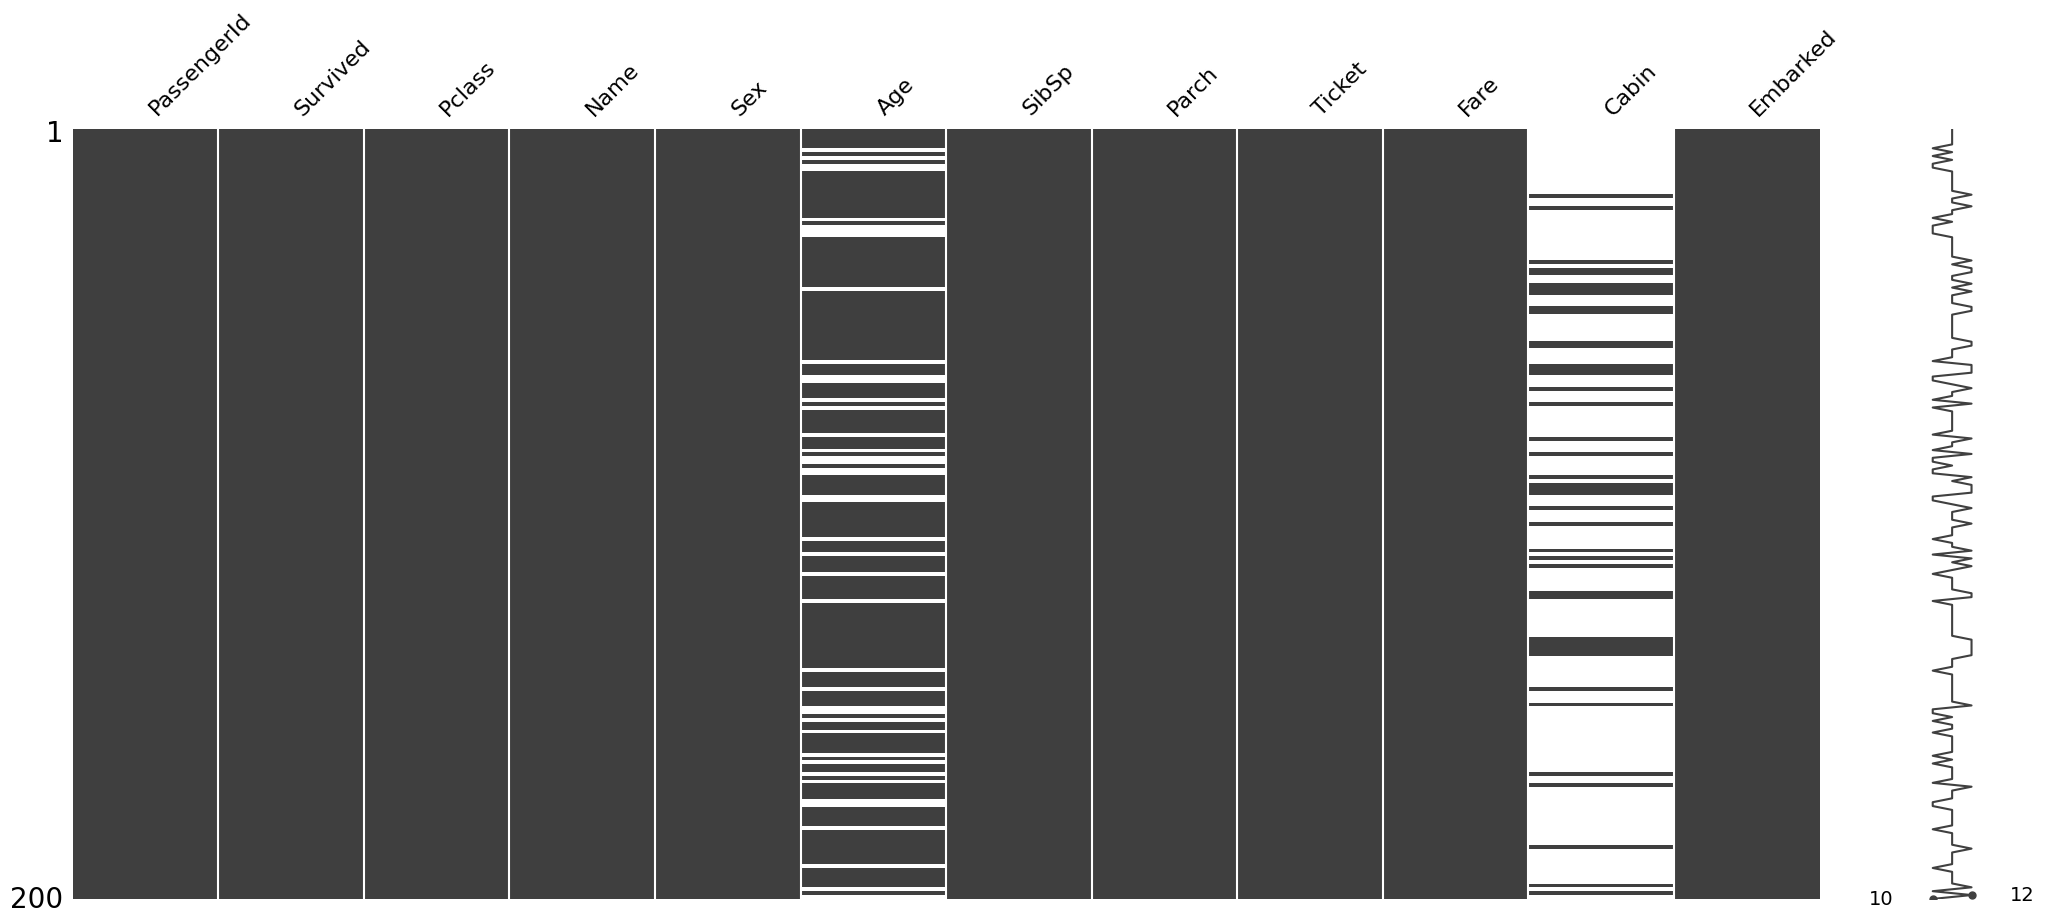

In [ ]:
msno.matrix(df.sample(200))

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['Cabin']=df['Cabin'].str.extract(r'([A-Za-z])')
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df_test['Cabin']=df_test['Cabin'].str.extract(r'([A-Za-z])')
df_test['Cabin'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

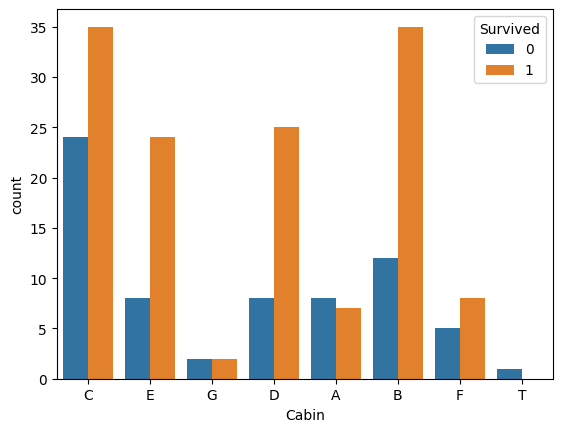

In [ ]:
ay=sns.countplot(data=df, x='Cabin', hue='Survived')

In [ ]:
most_common_cabin = df['Cabin'].mode().iloc[0]
df['Cabin'].fillna(most_common_cabin, inplace=True)

In [ ]:
df_test['Cabin'].fillna(most_common_cabin, inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [ ]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,C,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,C,S


<Axes: >

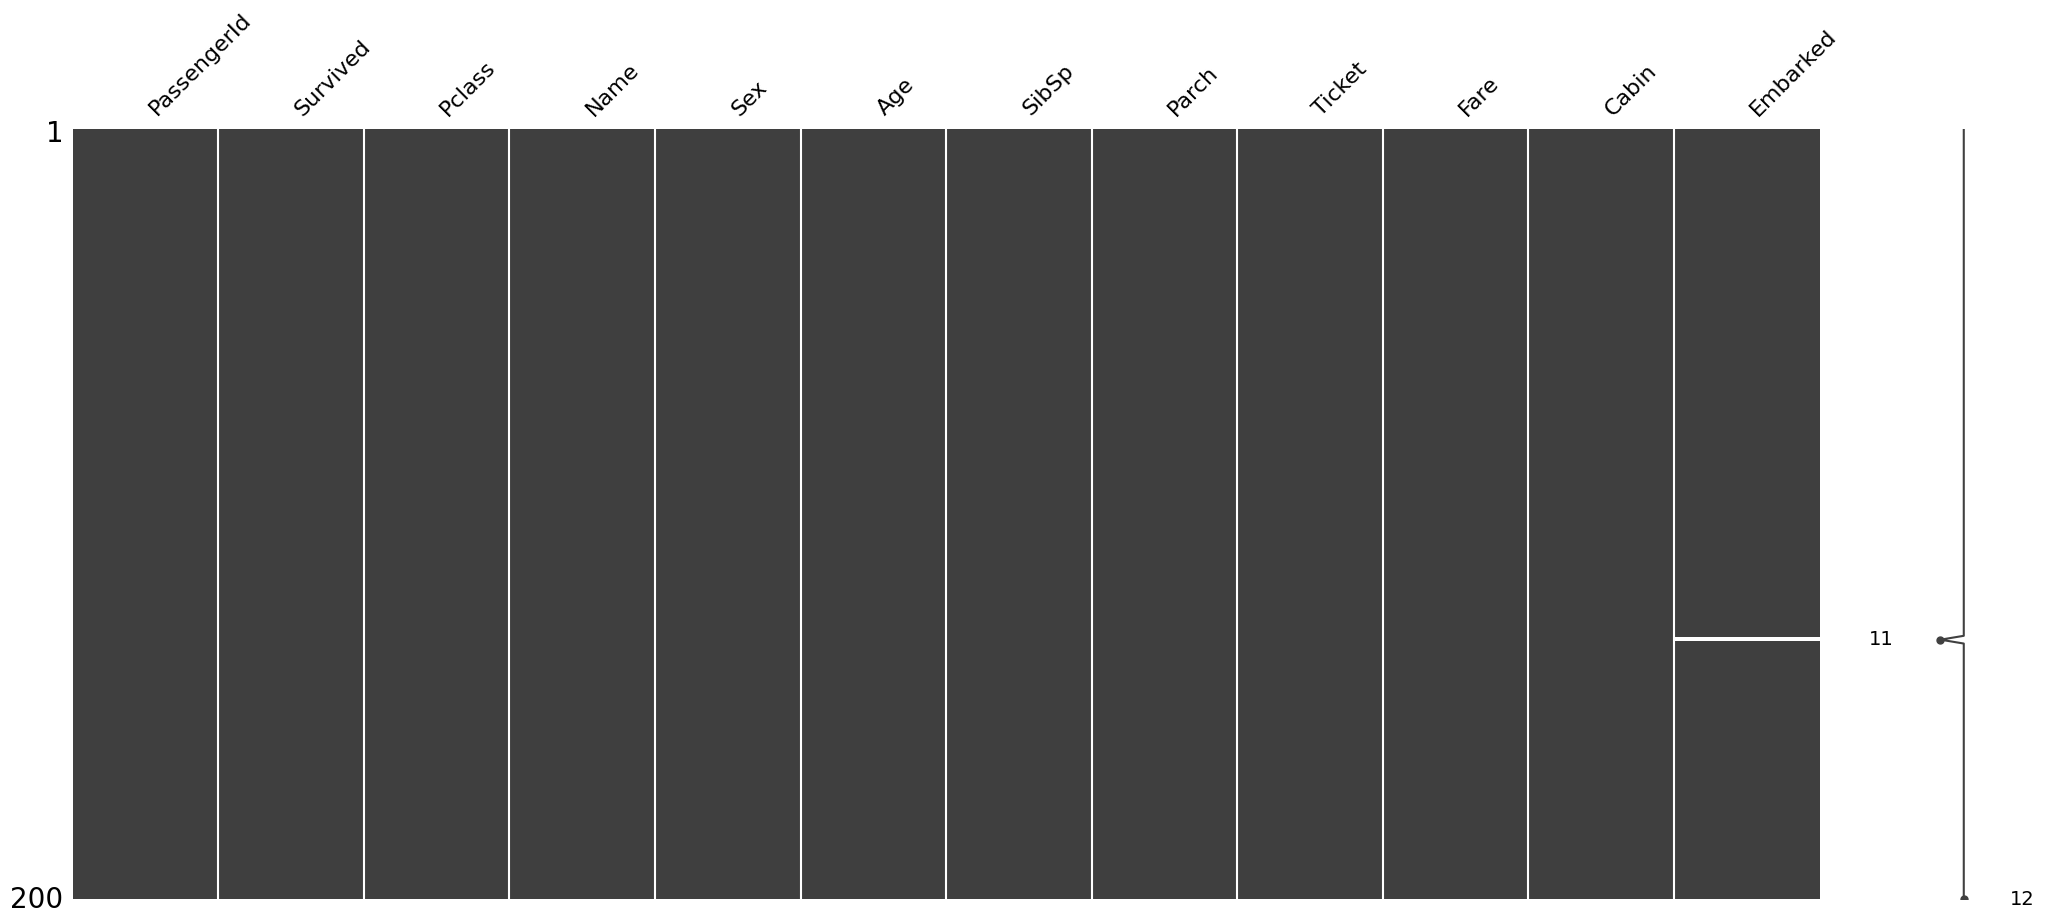

In [ ]:
msno.matrix(df.sample(200))

In [ ]:
# Check for duplicates based on multiple columns
duplicate_rows = df.duplicated(subset=['PassengerId', 'Name', 'Ticket'])

# Display rows that are duplicates
duplicates = df[duplicate_rows]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


There are no duplicates.

In [ ]:
df_removed=df.drop(columns=["Ticket","PassengerId","Name","Embarked"])
df_removed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,C
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,C
3,1,1,female,35.0,1,0,53.1000,C
4,0,3,male,35.0,0,0,8.0500,C


In [ ]:
df_test_ticket=df_test['Ticket'].copy()
df_test_ticket

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object

In [ ]:
df_test=df_test.drop(columns=["Ticket","PassengerId","Name","Embarked"])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,male,34.5,0,0,7.8292,C
1,3,female,47.0,1,0,7.0000,C
2,2,male,62.0,0,0,9.6875,C
3,3,male,27.0,0,0,8.6625,C
4,3,female,22.0,1,1,12.2875,C


# **Pre-process**

In [ ]:
def mapping(df,mapping,column):
  df[column] = df[column].map(mapping)
  print(df[column].unique())

In [ ]:
# Create a mapping dictionary
sex_mapping = {'female': 1, 'male': 0}
mapping(df_removed,sex_mapping,'Sex')
mapping(df_test,sex_mapping,'Sex')

[0 1]
[0 1]


In [ ]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,0,34.5,0,0,7.8292,C
1,3,1,47.0,1,0,7.0000,C
2,2,0,62.0,0,0,9.6875,C
3,3,0,27.0,0,0,8.6625,C
4,3,1,22.0,1,1,12.2875,C
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,C
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,C
416,3,0,27.0,0,0,8.0500,C


In [ ]:
df_removed['Cabin'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df_test['Cabin'].unique()

array(['C', 'B', 'E', 'A', 'D', 'F', 'G'], dtype=object)

In [ ]:
# Create a mapping dictionary/Mapping For Correlation. One hot Encoding Will be used for cabin column.
cabin_mapping = {'C': 1, 'E': 2,'G': 3, 'D': 4,'A': 5, 'B': 6,'F': 7, 'T': 8}
df_corr=df_removed.copy()
df_corr_test=df_test.copy()
# Use the map function to replace values in the 'Gender' column

mapping(df_corr, cabin_mapping, 'Cabin')
mapping(df_corr_test, cabin_mapping, 'Cabin')

[1 2 3 4 5 6 7 8]
[1 6 2 5 4 7 3]


In [ ]:
df_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,6
888,0,3,1,28.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,1


In [ ]:
df_corr_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,1
416,3,0,27.0,0,0,8.0500,1


# **Correlation Matrix**

<Axes: >

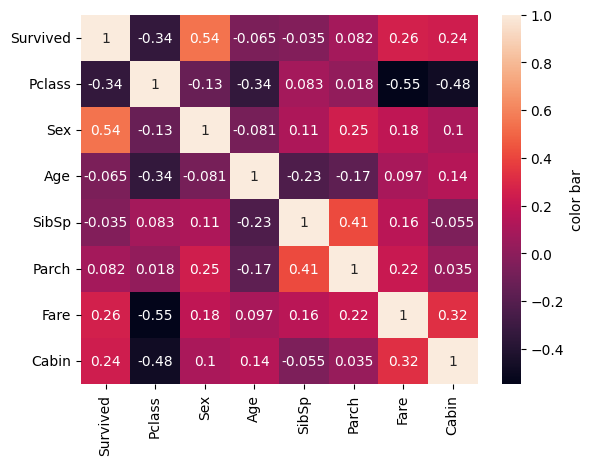

In [ ]:
sns.heatmap(df_corr.corr(method='pearson'),annot=True,
              cbar_kws={"orientation":"vertical","label":"color bar"},
              )

<Axes: >

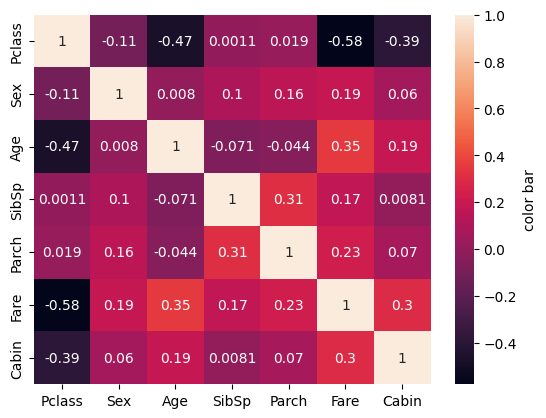

In [ ]:
sns.heatmap(df_corr_test.corr(method='pearson'),annot=True,
              cbar_kws={"orientation":"vertical","label":"color bar"},
              )

# **One-Hot Encoding**

In [ ]:
df_encoded = pd.get_dummies(df_removed, columns=['Pclass', 'Cabin'], prefix=['Pclass_', 'Cabin_'])

In [ ]:
df_encoded_test=pd.get_dummies(df_test, columns=['Pclass', 'Cabin'], prefix=['Pclass_', 'Cabin_'])

In [ ]:
df_encoded

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0,1,0,0,0,1,0,0,0,0,0
887,1,1,19.0,0,0,30.0000,1,0,0,0,1,0,0,0,0,0,0
888,0,1,28.0,1,2,23.4500,0,0,1,0,0,1,0,0,0,0,0
889,1,0,26.0,0,0,30.0000,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_encoded_test["Cabin__T"]=0

In [ ]:
df_encoded_test

,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0,0,0
1,1,47.0,1,0,7.0000,0,0,1,0,0,1,0,0,0,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,27.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0
414,1,39.0,0,0,108.9000,1,0,0,0,0,1,0,0,0,0,0
415,0,38.5,0,0,7.2500,0,0,1,0,0,1,0,0,0,0,0
416,0,27.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_encoded['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

# **Normalization**

In [ ]:
def minmax_scaler(df, columns):
    df_normalized = df.copy()

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Normalize specified columns
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

    return df_normalized

In [ ]:
df_train_last=df_encoded
df_test_last=df_encoded_test

In [ ]:
df_test_last

,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0,0,0
1,1,47.0,1,0,7.0000,0,0,1,0,0,1,0,0,0,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,27.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0
414,1,39.0,0,0,108.9000,1,0,0,0,0,1,0,0,0,0,0
415,0,38.5,0,0,7.2500,0,0,1,0,0,1,0,0,0,0,0
416,0,27.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_train_last

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0,1,0,0,0,1,0,0,0,0,0
887,1,1,19.0,0,0,30.0000,1,0,0,0,1,0,0,0,0,0,0
888,0,1,28.0,1,2,23.4500,0,0,1,0,0,1,0,0,0,0,0
889,1,0,26.0,0,0,30.0000,1,0,0,0,0,1,0,0,0,0,0


# **Creating The Neural Network**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
X_train=df_train_last.copy().drop(columns=['Survived'])
y_train=df_train_last['Survived']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train=minmax_scaler(X_train,['Age','SibSp','Parch','Fare'])

In [ ]:
X_test=minmax_scaler(df_test_last,['Age','SibSp','Parch','Fare'])
X_test

,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,0,0.452723,0.000,0.000000,0.015282,0,0,1,0,0,1,0,0,0,0,0
1,1,0.617566,0.125,0.000000,0.013663,0,0,1,0,0,1,0,0,0,0,0
2,0,0.815377,0.000,0.000000,0.018909,0,1,0,0,0,1,0,0,0,0,0
3,0,0.353818,0.000,0.000000,0.016908,0,0,1,0,0,1,0,0,0,0,0
4,1,0.287881,0.125,0.111111,0.023984,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0.353818,0.000,0.000000,0.015713,0,0,1,0,0,1,0,0,0,0,0
414,1,0.512066,0.000,0.000000,0.212559,1,0,0,0,0,1,0,0,0,0,0
415,0,0.505473,0.000,0.000000,0.014151,0,0,1,0,0,1,0,0,0,0,0
416,0,0.353818,0.000,0.000000,0.015713,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
print(df_test_ticket)

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object


In [ ]:
X_train

,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
331,0,0.566474,0.000,0.000000,0.055628,1,0,0,0,0,1,0,0,0,0,0
733,0,0.283740,0.000,0.000000,0.025374,0,1,0,0,0,1,0,0,0,0,0
382,0,0.396833,0.000,0.000000,0.015469,0,0,1,0,0,1,0,0,0,0,0
704,0,0.321438,0.125,0.000000,0.015330,0,0,1,0,0,1,0,0,0,0,0
813,1,0.070118,0.500,0.333333,0.061045,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0.258608,0.000,0.000000,0.014932,0,0,1,0,0,1,0,0,0,0,0
270,0,0.346569,0.000,0.000000,0.060508,1,0,0,0,0,1,0,0,0,0,0
860,0,0.509927,0.250,0.000000,0.027538,0,0,1,0,0,1,0,0,0,0,0
435,1,0.170646,0.125,0.333333,0.234224,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_val=minmax_scaler(X_val,['Age','SibSp','Parch','Fare'])
X_val

,Sex,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
709,0,0.387203,0.25,0.2,0.058107,0,0,1,0,0,1,0,0,0,0,0
439,0,0.429956,0.00,0.0,0.040019,0,1,0,0,0,1,0,0,0,0,0
840,0,0.273194,0.00,0.0,0.030205,0,0,1,0,0,1,0,0,0,0,0
720,1,0.073678,0.00,0.2,0.125774,0,1,0,0,0,1,0,0,0,0,0
39,1,0.187687,0.25,0.0,0.042846,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0,0.230440,0.00,0.0,0.027156,0,0,1,0,0,1,0,0,0,0,0
773,0,0.387203,0.00,0.0,0.027537,0,0,1,0,0,1,0,0,0,0,0
25,1,0.529714,0.25,1.0,0.119628,0,0,1,0,0,1,0,0,0,0,0
84,1,0.230440,0.00,0.0,0.040019,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
def get_new_model(input_shape):
  model = Sequential()
  model.add(Dense(16, input_dim=input_shape, activation='relu'))
  #model.add(Dropout(0.1))
  model.add(Dense(4, activation='relu'))
  #model.add(Dropout(0.1))
  model.add(Dense(1, activation='sigmoid'))

  return(model)

In [ ]:
model=get_new_model(X_train.shape[1])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping_monitor=EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=10)

Epoch 1/200
57/57 [==============================] - 1s 7ms/step - loss: 0.6853 - accuracy: 0.6221 - val_loss: 0.6599 - val_accuracy: 0.6783
Epoch 2/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6696 - val_loss: 0.6120 - val_accuracy: 0.7902
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7381 - val_loss: 0.5490 - val_accuracy: 0.8112
Epoch 4/200
57/57 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7680 - val_loss: 0.5026 - val_accuracy: 0.8182
Epoch 5/200
57/57 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7698 - val_loss: 0.4718 - val_accuracy: 0.8182
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7680 - val_loss: 0.4452 - val_accuracy: 0.8182
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.7750 - val_loss: 0.4266 - val_accuracy: 0.8182
Epoch 8/200
5

In [ ]:
predictions=model.predict(X_val)

6/6 [==============================] - 0s 3ms/step


In [ ]:
X_test_predictions=model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
submission_predictions=(X_test_predictions>0.5).astype(int)

In [ ]:
predictions

array([[0.05310115],
       [0.06235167],
       [0.13987528],
       [0.9842499 ],
       [0.21359022],
       [0.9596901 ],
       [0.61466676],
       [0.03440594],
       [0.5530932 ],
       [0.99943054],
       [0.3628224 ],
       [0.114824  ],
       [0.0286305 ],
       [0.16032787],
       [0.05329096],
       [0.9993175 ],
       [0.9205935 ],
       [0.6146884 ],
       [0.07182886],
       [0.12423211],
       [0.14871982],
       [0.2548626 ],
       [0.24094196],
       [0.14457656],
       [0.18597513],
       [0.01524724],
       [0.21327595],
       [0.06199291],
       [0.02564291],
       [0.6036989 ],
       [0.13760565],
       [0.58553094],
       [0.2871123 ],
       [0.61461216],
       [0.13600466],
       [0.09629963],
       [0.05814454],
       [0.61466676],
       [0.9578362 ],
       [0.15813611],
       [0.12423772],
       [0.09249914],
       [0.15874566],
       [0.15756154],
       [0.43356195],
       [0.07669455],
       [0.13853174],
       [0.151

In [ ]:
binary_predictions=(predictions>0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(binary_predictions,y_val)

In [ ]:
accuracy

0.8324022346368715

In [ ]:
len(submission_predictions)

418

In [ ]:
submission_predictions[:,0]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_test_ID=pd.DataFrame(df_test_passID)
df_test_out=df_test_ID.copy()

In [ ]:
df_test_out['Survived']=submission_predictions

In [ ]:
df_test_out

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
file_path = 'titanic_nn_submission_.csv'
df_test_out.to_csv(file_path, index=False)

In [ ]:
df_out=pd.read_csv('titanic_nn_submission_.csv')
df_out

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
